# Energy and time optimizations for double-pendulum reaching model. 


Wong Cluff Kuo computed a force-rate coefficient of 8.5e-2. 

Here we show that using this coefficient on force-rate generates a quantitatively-similar cost to that measured in the paper. 

error q1 is -5.551115123125783e-15 and q2 is 8.090750291955828e-15
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1149
Number of nonzeros in inequality constraint Jacobian.:      463
Number of nonzeros in Lagrangian Hessian.............:      519

Total number of variables............................:      380
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      221
Total number of inequality constraints...............:      253
        inequality constraints with only lower bounds:       85
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      168

iter    objective   

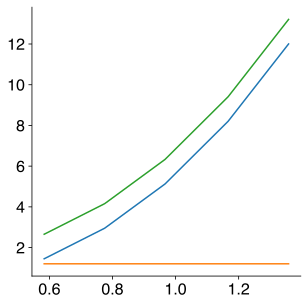

In [8]:
#%% Loop across distances and valuations to generate double-pendulum distance/time predictions. 
import ReachingModels as reaching
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import sys
import plotpresentlib as pp
sys.path.insert(0,'parameterFiles')
import colour as clr 

# model that has equations to compute endpoint jacobians, equations of motion, and energy. 
sim = reaching.Kinarm()

q1_targets_sho = np.array([[62.0000, 87.0000],
  [66.3376,   82.6624],
  [68.6401,   80.3599],
  [70.0806,   78.9194],
  [70.9822,   78.0178]])*(np.pi/180)

q2_elb = 5/180

timeExptHalfCycle = np.array([0.8571,    0.6451,    0.5173,    0.4286,    0.3681])
freqs = 1/(2*timeExptHalfCycle) 

color1 = clr.Color("#e0f3db")
M = q1_targets_sho.shape[0]
distcolors = list(color1.range_to(clr.Color("#084081"),M))

duration  = np.zeros(M)
J         = np.zeros(M)
costFR    = np.zeros(M)
costWork  = np.zeros(M)
costTime  = np.zeros(M)
peakspeed = np.zeros(M)

trajList = list()
for i in range(0,M):
  prevOpti = sim.movementTimeOptSetup(
    theTimeValuation  = 1.0,
    theN              = 20, 
    thediscreteOrCont='continuous',
    theDuration = timeExptHalfCycle[i]*2)
  
  xystart = sim.joints2Endpoint([q1_targets_sho[i,0],q2_elb])
  xyend   = sim.joints2Endpoint([q1_targets_sho[i,1],q2_elb])

  qcheck  = sim.xy2joints(xystart)
  qerr    = [q1_targets_sho[i,0]-qcheck[0],q2_elb-qcheck[1]]
  
  print('error q1 is ' + str(qerr[0]) + ' and q2 is ' + str(qerr[1]))

  trajResult, solOpti = sim.updateGuessAndSolve(
    prevOpti,
    xystart,
    xyend,
    theFRCoef=8.5e-2,
    theGeneratePlots=0)
    
    #unpack the results
  duration[i] = trajResult.duration
  J[i]        = trajResult.costJ
  costFR[i]   = trajResult.costFR
  costWork[i] = trajResult.costWork
  peakspeed[i] = trajResult.peakspeed
  trajList.append(trajResult)

f,ax = plt.subplots()
ax.plot(freqs,costFR / duration)
ax.plot(freqs,costWork / duration)
ax.plot(freqs,(costFR+costWork) / duration)
pp.boxoff()
pp.figurefyTalk()


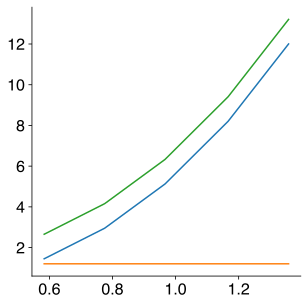

In [2]:
f,ax = plt.subplots()
ax.plot(freqs,costFR / duration)
ax.plot(freqs,costWork / duration)
ax.plot(freqs,(costFR+costWork) / duration)
pp.boxoff()
pp.figurefyTalk()